In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('Seasons_Stats_1.csv')

In [3]:
data.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Picks
0,1950,Curly Armstrong,G-F,31.0,FTW,63,NaN,NaN,NaN,0.368,...,NaN,NaN,NaN,176,NaN,NaN,NaN,217,458,NaN
1,1950,Cliff Barker,SG,29.0,INO,49,NaN,NaN,NaN,0.435,...,NaN,NaN,NaN,109,NaN,NaN,NaN,99,279,NaN
2,1950,Leo Barnhorst,SF,25.0,CHS,67,NaN,NaN,NaN,0.394,...,NaN,NaN,NaN,140,NaN,NaN,NaN,192,438,NaN
3,1950,Ed Bartels,F,24.0,TOT,15,NaN,NaN,NaN,0.312,...,NaN,NaN,NaN,20,NaN,NaN,NaN,29,63,NaN
4,1950,Ed Bartels,F,24.0,DNN,13,NaN,NaN,NaN,0.308,...,NaN,NaN,NaN,20,NaN,NaN,NaN,27,59,NaN


In [4]:
data = data.fillna(0)

In [5]:
data = data.astype({'Picks': 'int32'})

In [6]:
data = data.astype({'Year': 'int32'})

In [7]:
data.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Picks
0,1950,Curly Armstrong,G-F,31.0,FTW,63,0.0,0.0,0.0,0.368,...,0.0,0.0,0.0,176,0.0,0.0,0.0,217,458,0
1,1950,Cliff Barker,SG,29.0,INO,49,0.0,0.0,0.0,0.435,...,0.0,0.0,0.0,109,0.0,0.0,0.0,99,279,0
2,1950,Leo Barnhorst,SF,25.0,CHS,67,0.0,0.0,0.0,0.394,...,0.0,0.0,0.0,140,0.0,0.0,0.0,192,438,0
3,1950,Ed Bartels,F,24.0,TOT,15,0.0,0.0,0.0,0.312,...,0.0,0.0,0.0,20,0.0,0.0,0.0,29,63,0
4,1950,Ed Bartels,F,24.0,DNN,13,0.0,0.0,0.0,0.308,...,0.0,0.0,0.0,20,0.0,0.0,0.0,27,59,0


In [8]:
len(data.columns)

53

In [9]:
all_nba = pd.read_csv('all_nba.csv')

In [10]:
all_nba.head()

,Year_start,Year_end,Name1,Name2,Name3,Name4,Name5
0,2016,2017,Anthony Davis C,LeBron James F,Kawhi Leonard F,James Harden G,Russell Westbrook G
1,2016,2017,Rudy Gobert C,Giannis Antetokounmpo F,Kevin Durant F,Stephen Curry G,Isaiah Thomas G
2,2016,2017,DeAndre Jordan C,Draymond Green F,Jimmy Butler F,John Wall G,DeMar DeRozan G
3,2015,2016,DeAndre Jordan C,LeBron James F,Kawhi Leonard F,Stephen Curry G,Russell Westbrook G
4,2015,2016,DeMarcus Cousins C,Kevin Durant F,Draymond Green F,Chris Paul G,Damian Lillard G


In [11]:
all_nba_1=pd.DataFrame()

In [12]:
all_nba_1=all_nba

In [13]:
all_nba_1 = all_nba_1.astype({'Year_end': 'int32'})

In [14]:
all_nba_1['Name1'] = all_nba_1['Name1'].astype(str).str[:-2]
all_nba_1['Name2'] = all_nba_1['Name2'].astype(str).str[:-2]
all_nba_1['Name3'] = all_nba_1['Name3'].astype(str).str[:-2]
all_nba_1['Name4'] = all_nba_1['Name4'].astype(str).str[:-2]
all_nba_1['Name5'] = all_nba_1['Name5'].astype(str).str[:-2]

In [15]:
all_nba_1.head()

,Year_start,Year_end,Name1,Name2,Name3,Name4,Name5
0,2016,2017,Anthony Davis,LeBron James,Kawhi Leonard,James Harden,Russell Westbrook
1,2016,2017,Rudy Gobert,Giannis Antetokounmpo,Kevin Durant,Stephen Curry,Isaiah Thomas
2,2016,2017,DeAndre Jordan,Draymond Green,Jimmy Butler,John Wall,DeMar DeRozan
3,2015,2016,DeAndre Jordan,LeBron James,Kawhi Leonard,Stephen Curry,Russell Westbrook
4,2015,2016,DeMarcus Cousins,Kevin Durant,Draymond Green,Chris Paul,Damian Lillard


In [16]:
data.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Picks
0,1950,Curly Armstrong,G-F,31.0,FTW,63,0.0,0.0,0.0,0.368,...,0.0,0.0,0.0,176,0.0,0.0,0.0,217,458,0
1,1950,Cliff Barker,SG,29.0,INO,49,0.0,0.0,0.0,0.435,...,0.0,0.0,0.0,109,0.0,0.0,0.0,99,279,0
2,1950,Leo Barnhorst,SF,25.0,CHS,67,0.0,0.0,0.0,0.394,...,0.0,0.0,0.0,140,0.0,0.0,0.0,192,438,0
3,1950,Ed Bartels,F,24.0,TOT,15,0.0,0.0,0.0,0.312,...,0.0,0.0,0.0,20,0.0,0.0,0.0,29,63,0
4,1950,Ed Bartels,F,24.0,DNN,13,0.0,0.0,0.0,0.308,...,0.0,0.0,0.0,20,0.0,0.0,0.0,27,59,0


In [17]:
for index,row in data.iterrows():
    
    row = list(row)
    year = row[0]
    name = row[1]
   
    for index2,row2 in all_nba_1.iterrows():
    
        if (row2['Year_end'] == year) and (row2['Name1']== name or row2['Name2']== name or row2['Name3']== name or row2['Name4']== name or row2['Name5']== name):
                data.at[index,'Picks']=1

In [ ]:
plt.plot(data.Picks)

In [18]:
# verifying if the count matches
for index,row in data.iterrows():
    
    if (row['Picks'] >0) and (row['Player'] == "LeBron James") :
        print(row['Player'],row['Picks'])

LeBron James 1
LeBron James 1
LeBron James 1
LeBron James 1
LeBron James 1
LeBron James 1
LeBron James 1
LeBron James 1
LeBron James 1
LeBron James 1
LeBron James 1
LeBron James 1
LeBron James 1


In [61]:
list_year = data['Year'].unique()

In [62]:
list_year

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

In [137]:
data.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Picks
0,1950,Curly Armstrong,G-F,31.0,FTW,63,0.0,0.0,0.0,0.368,...,0.0,0.0,0.0,176,0.0,0.0,0.0,217,458,0
1,1950,Cliff Barker,SG,29.0,INO,49,0.0,0.0,0.0,0.435,...,0.0,0.0,0.0,109,0.0,0.0,0.0,99,279,0
2,1950,Leo Barnhorst,SF,25.0,CHS,67,0.0,0.0,0.0,0.394,...,0.0,0.0,0.0,140,0.0,0.0,0.0,192,438,0
3,1950,Ed Bartels,F,24.0,TOT,15,0.0,0.0,0.0,0.312,...,0.0,0.0,0.0,20,0.0,0.0,0.0,29,63,0
4,1950,Ed Bartels,F,24.0,DNN,13,0.0,0.0,0.0,0.308,...,0.0,0.0,0.0,20,0.0,0.0,0.0,27,59,0


In [215]:
test_df = pd.DataFrame()

In [216]:
test1_df = pd.DataFrame()

In [234]:
test1_df = data[data['Player'] == 'Karl-Anthony Towns']

In [235]:
test1_df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Picks
23974,2016,Karl-Anthony Towns,C,20.0,MIN,82,82.0,2627.0,22.5,0.590,...,229.0,629.0,858.0,161,58.0,138.0,183.0,245,1503,0
24558,2017,Karl-Anthony Towns,C,21.0,MIN,82,82.0,3030.0,26.0,0.618,...,296.0,711.0,1007.0,220,57.0,103.0,212.0,241,2061,0


In [246]:
test1_df = test1_df.append(data[data['Player'] == 'Stephen Curry'])

In [ ]:
test1_df = test1_df.append(data[data['Player'] == 'Kyrie Irving'])

In [247]:
test1_df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Picks
21325,2012,Kyrie Irving,PG,19.0,CLE,51,51.0,1558.0,21.4,0.566,...,44.0,147.0,191.0,275,54.0,20.0,160.0,110,944,0
21863,2013,Kyrie Irving,PG,20.0,CLE,59,59.0,2048.0,21.4,0.553,...,34.0,182.0,216.0,350,89.0,21.0,191.0,146,1325,0
22477,2014,Kyrie Irving,PG,21.0,CLE,71,71.0,2496.0,20.1,0.533,...,52.0,207.0,259.0,433,108.0,23.0,190.0,163,1478,0
23083,2015,Kyrie Irving,PG,22.0,CLE,75,75.0,2730.0,21.5,0.583,...,55.0,182.0,237.0,389,114.0,20.0,186.0,146,1628,1
23712,2016,Kyrie Irving,PG,23.0,CLE,53,53.0,1667.0,19.9,0.540,...,44.0,113.0,157.0,249,56.0,18.0,124.0,107,1041,0
24293,2017,Kyrie Irving,PG,24.0,CLE,72,72.0,2525.0,23.0,0.580,...,52.0,178.0,230.0,418,83.0,25.0,180.0,157,1816,0
21325,2012,Kyrie Irving,PG,19.0,CLE,51,51.0,1558.0,21.4,0.566,...,44.0,147.0,191.0,275,54.0,20.0,160.0,110,944,0
21863,2013,Kyrie Irving,PG,20.0,CLE,59,59.0,2048.0,21.4,0.553,...,34.0,182.0,216.0,350,89.0,21.0,191.0,146,1325,0
22477,2014,Kyrie Irving,PG,21.0,CLE,71,71.0,2496.0,20.1,0.533,...,52.0,207.0,259.0,433,108.0,23.0,190.0,163,1478,0
23083,2015,Kyrie Irving,PG,22.0,CLE,75,75.0,2730.0,21.5,0.583,...,55.0,182.0,237.0,389,114.0,20.0,186.0,146,1628,1


In [248]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

/Users/anilbulusu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


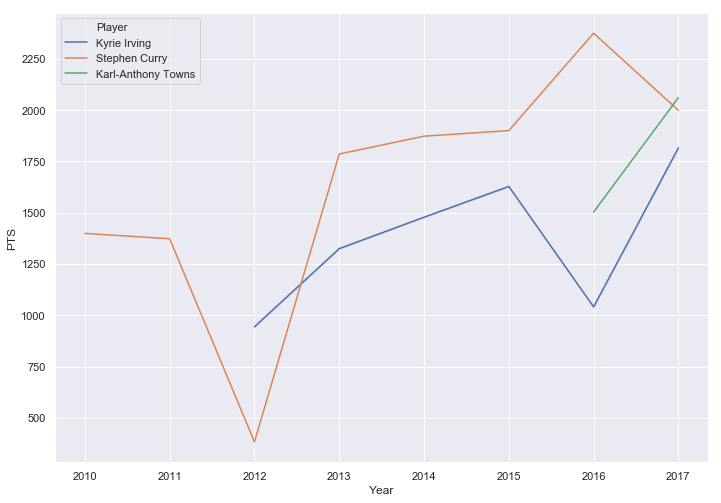

In [249]:
ax = sns.lineplot(x="Year", y="PTS", hue='Player',data=test1_df)

In [145]:
len(data.Player.unique())

3921

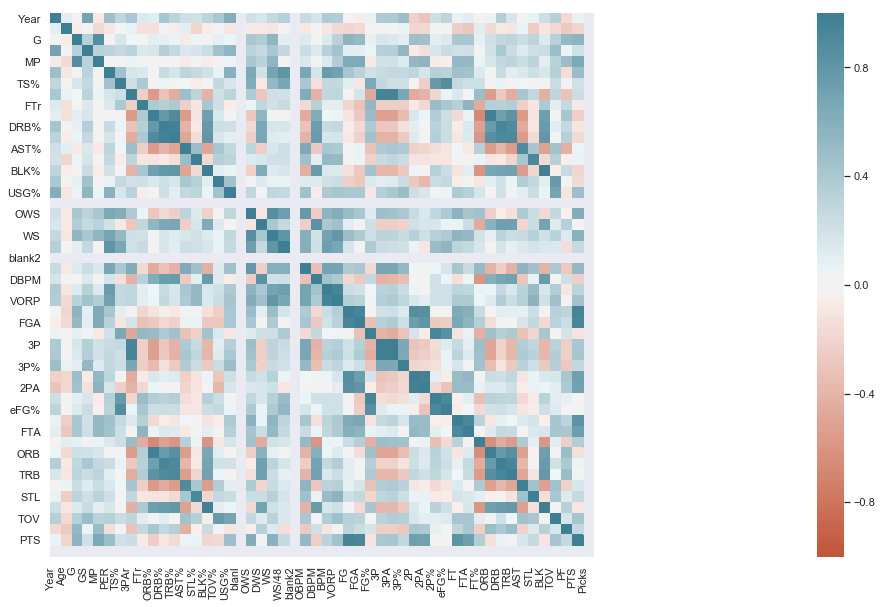

In [169]:
# Correlation heatmap
sns.set(rc={'figure.figsize':(80,10)})

corr = test1_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);